Importing Libraries


In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.colors as plc

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import plotly
import time
import plotly.graph_objs as go



Load Data

In [2]:
# Load Breast Cancer dataset
breast = load_breast_cancer()
breast_data = breast.data
breast_labels = breast.target

# Data and Labels shape
print(f'Data shape: {breast_data.shape}')
print(f'Label shape : {breast_labels.shape}')

Data shape: (569, 30)
Label shape : (569,)


In [3]:
# We will reshape the breast_labels to concatenate with data
labels = np.reshape(breast_labels,(569,1))

# Concatenate those two datasets
final_breast_data = np.concatenate([breast_data,labels],axis=1)
print(final_breast_data.shape)

(569, 31)


In [4]:
breast_dataset = pd.DataFrame(final_breast_data)

# Getting features from breast JSON data
features = breast.feature_names

print(len(features)) # Missing label = 30, because we added it manually using concatenate function.
features

30


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
# There is no labels in features array because we did it manually after converting
# JSON to np dataset and concatenated

features_labels = np.append(features,'label')
breast_dataset.columns = features_labels



In [6]:
breast_dataset.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [7]:
# Replace 0 with Benign, 1 with Malignant.

# Benign: Benign: These tumors are not cancerous
# Malignant: Malignant tumors are cancerous.
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)


In [8]:
breast_dataset.tail()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


In [9]:
from sklearn.preprocessing import StandardScaler
# Create a NumPy array that contains the columns 
# specified in the features list and encompasses all rows which means 
# this data does not containt 'label'.

x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features
x.shape

(569, 30)

In [10]:
# Changing feature names 
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)


In [11]:
normalised_breast.tail()


,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [12]:
# Specify a function that demonstrates all required processes and returns accuracy rating #

# This function trains dataset without any PCA process. 
def TRAIN_WITHOUT_PCA(dataset,labels):
        X = dataset
        Y = labels
        
        # Split the data into training and testing sets
        X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.4, random_state=42) 
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  
        
        # Define your model
        model = Sequential()
        model.add(Dense(1024, input_dim=dataset.shape[1], activation='relu'))
        model.add(Dense(1024, activation='relu'))
        model.add(Dense(512, activation='relu'))
        model.add(Dense(256, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))

        # Compile the model
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        # Train the model
        start_time = time.time()
        history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
        end_time = time.time()
        
        loss, accuracy = model.evaluate(X_val, y_val)
        training_time = end_time - start_time
        val_accuracy = history.history['val_accuracy'][-1]
        
        info = [loss, accuracy, training_time, val_accuracy]
        info_text = (f'[*] | ORIGINAL DATA | Test Loss: {loss:.4f} | Test Accuracy: {accuracy:.4f} | Time: {training_time:.4f} | Validation Accuracy: {val_accuracy:.4f}')
        info.append(info_text)
        return info


# Case refers to PCA component test cases. Its an object which stores all required functions and visualization processes including training.
class CASE:
    def __init__(self, dataset, num_components):
        self.training_data = None
        self.dataset = dataset
        self.component_number = num_components
        if type(num_components) == float :
            self.information = self.calculate_information_float()        
        else:
            self.information = self.calculate_information()
        self.training_information = None
    
    # if PCA inputs are float, this will generate the train data using PCA percentage
    def calculate_information_float(self):
        pca = PCA(self.component_number)
        PCA_Breast = pca.fit_transform(self.dataset)
        PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None, svd_solver='auto', tol=0.0, whiten=False)
        
        self.training_data = PCA_Breast
        
        explained_variance_list = [[index + 1, round(value * 100, 2)] for index, value in enumerate(pca.explained_variance_ratio_)]
        total = 0
        for i,t in explained_variance_list:
            total+=t
        loss = 100-total
        explained_variance_list.append([self.component_number+1,loss])
        return explained_variance_list
    
    # if PCA inputs are integer, this will generate the train data using PCA component number
    def calculate_information(self):
        pca = PCA(self.component_number)
        columns = []
        PCA_Breast = pca.fit_transform(self.dataset)
        for i in range(self.component_number):
            if type(i) == int:
                columns.append(f'PC{i+1}')
            else:
                columns.append(f'PC{i}')        
        self.training_data = pd.DataFrame(data = PCA_Breast, columns = columns)
        explained_variance_list = [[index + 1, round(value * 100, 2)] for index, value in enumerate(pca.explained_variance_ratio_)]
        total = 0
        for i,t in explained_variance_list:
            total+=t
        loss = 100-total
        explained_variance_list.append([self.component_number+1,loss])
        return explained_variance_list

    # Basic representation function
    def __repr__(self):
        output = f'\n[CASE Component Number : {self.component_number}]\n'
        output += ('Information Percentage: ')
        total = 0
        for index,comp_acc in self.information[:-1]:
            output+=(f'\nPC{index} : %{(comp_acc)}')
            total += comp_acc
        
        output+= f'\nLoss : %{(self.information[-1][1]):.2f}'
        self.loss = self.information[-1][1]
        return output

    # Creates a graph which represents case's explained_variance_ratio and loss percentage.
    def Graph(self):
        x = [data[0] for data in self.information]
        y = [data[1] for data in self.information]
        labels = [str(data[0]) if data[0] != x[-1] else 'loss' for data in self.information]

        colors = ['blue'] * (len(x) - 1) + ['red']
        plt.bar(x, y, color=colors)
        plt.xticks(x, labels)
        plt.yticks(y)
        plt.gca().get_xticklabels()[-1].set_color('red')
        # Eksen etiketlerini ve başlığı ekleme
        plt.xlabel('Component Number')
        plt.ylabel('Information Accuracy')

        # Grafiği gösterme
        plt.show()

    # Main Visualize function for case. Checks input dimension and calls corresponding method.
    def Visualize(self):
        dataframe = self.training_data
        dim = dataframe.shape[1]
        if dim > 5:
            print(f'Shape of dataframe is not supported. Only supports up to 5 dimensions. We got {dataframe.shape[1]}')
            return
        if dim == 2:
            self.V_2(dataframe)
        elif dim ==3:
            self.V_3(dataframe)
        elif dim == 4 :
            self.V_4(dataframe)
        elif dim == 5:
            self.V_5(dataframe)
    
    '''
    2 Dimension (2D) Visualization
    x = PC1 
    y = PC2
    '''
    def V_2(self, dataframe):
        
        dataframe = dataframe[:-1]
        labels = breast_labels

        # Renk skalası seçimi
        colorscale = plc.qualitative.Light24

        markercolor = [colorscale[i % len(colorscale)] for i in labels]

        fig1 = go.Scatter(x=dataframe['PC1'],
                        y=dataframe['PC2'],
                        marker=dict(color=markercolor,
                                opacity=1,
                                colorscale='Viridis',
                                size=10),
                        mode='markers')

        #Make Plot.ly Layout
        mylayout = go.Layout(xaxis=dict(title="PC1"),
                            yaxis=dict( title="PC2"))

        #Plot and save html
        plotly.offline.plot({"data": [fig1],
                            "layout": mylayout},
                            auto_open=True,
                            filename=('BREAST_2DPlot.html'))
    
    
    '''
    3 Dimension (3D) Visualization
    x = PC1 
    y = PC2 
    z = PC3
    '''
    
    def V_3(self,dataframe):
        dataframe = dataframe[:-1]
        labels = breast_labels
        colorscale = plc.qualitative.Light24
        markercolor = [colorscale[i % len(colorscale)] for i in labels]

        fig1 = go.Scatter3d(
            x=dataframe['PC1'],
            y=dataframe['PC2'],
            z=dataframe['PC3'],
            marker=dict(
                color=markercolor,
                colorscale='Blues',
                size=10),
                line=dict (width=0.02),
            mode='markers')

        mylayout = go.Layout(scene=dict(xaxis=dict( title="PC1"),
                                yaxis=dict( title="PC2"),
                                zaxis=dict(title="PC3")),)

        #Plot and save html
        plotly.offline.plot({"data": [fig1],
                            "layout": mylayout},
                            auto_open=True,
                            filename=("BREAST_3DPlot.html"))
    
    '''
    4 Dimension (4D) Visualization
    x = PC1 
    y = PC2 
    z = PC3
    size = PC4 
    '''
    
    def V_4(self,dataframe):
        dataframe = dataframe[:-1]
        labels = breast_labels
        colorscale = plc.qualitative.Light24
        markercolor = [colorscale[i % len(colorscale)] for i in labels]
        
        minimum_PC4 = dataframe['PC4'].min()
        maximum_PC4 = dataframe['PC4'].max()
        avg_PC4 = (minimum_PC4 + maximum_PC4) / 2
        markersize =  dataframe['PC4'].apply(lambda x: x+(-1*minimum_PC4)+avg_PC4)
        fig1 = go.Scatter3d(
            x=dataframe['PC1'],
            y=dataframe['PC2'],
            z=dataframe['PC3'],
            marker=dict(
                color=markercolor,
                colorscale='Blues',
                size=markersize*3),
                line=dict (width=0.02),
            mode='markers')

        mylayout = go.Layout(scene=dict(xaxis=dict( title="PC1"),
                                yaxis=dict( title="PC2"),
                                zaxis=dict(title="PC3")),)

        #Plot and save html
        plotly.offline.plot({"data": [fig1],
                            "layout": mylayout},
                            auto_open=True,
                            filename=("BREAST_4DPlot.html"))
    
    '''
    5 Dimension (5D) Visualization
    x = PC1 
    y = PC2 
    z = PC3
    size = PC4 
    shape = PC5
    '''
    def V_5(self,dataframe):
        dataframe = dataframe[:-1]
        labels = breast_labels
        
        colorscale = plc.qualitative.Light24
        markercolor = [colorscale[i % len(colorscale)] for i in labels]
        
        minimum_PC4 = dataframe['PC4'].min()
        maximum_PC4 = dataframe['PC4'].max()
        avg_PC4 = (minimum_PC4 + maximum_PC4) / 2
        markersize =  dataframe['PC4'].apply(lambda x: x+(-1*minimum_PC4)+avg_PC4)
        
        minimum = dataframe['PC5'].min()
        maximum = dataframe['PC5'].max()
        avg = (maximum + minimum)/2
        
        markershape = dataframe['PC5'].apply(lambda x: 'circle' if x < avg else 'diamond')
        fig1 = go.Scatter3d(
            x=dataframe['PC1'],
            y=dataframe['PC2'],
            z=dataframe['PC3'],
            marker=dict(
                color=markercolor,
                symbol=markershape,
                colorscale='Blues',
                size=markersize*3),
                line=dict (width=0.02),
            mode='markers')

        mylayout = go.Layout(scene=dict(xaxis=dict( title="PC1"),
                                yaxis=dict( title="PC2"),
                                zaxis=dict(title="PC3")),)

        #Plot and save html
        plotly.offline.plot({"data": [fig1],
                            "layout": mylayout},
                            auto_open=True,
                            filename=("BREAST_5DPlot.html"))
    
    # Trains the current dataset which is processed by PCA.
    def TRAIN(self, labels, TIME_WITHOUT_PCA):
        X = self.training_data
        Y = labels
        
        # Split the data into training and testing sets
        X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.4, random_state=42) 
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  

        # Define your model
        model = Sequential()
        model.add(Dense(1024, input_dim=self.training_data.shape[1], activation='relu'))
        model.add(Dense(512, activation='relu'))
        model.add(Dense(256, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))

        # Compile the model
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        # Train the model
        start_time = time.time()
        history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
        end_time = time.time()
        
        loss, accuracy = model.evaluate(X_val, y_val)
        training_time = end_time - start_time
        val_accuracy = history.history['val_accuracy'][-1]
        
        
        performance = TIME_WITHOUT_PCA * (TIME_WITHOUT_PCA - training_time) / 100 
        
        self.training_information = [self.component_number, loss,accuracy, training_time, val_accuracy, performance]
        return f'[*] | Shape: {X.shape} | Component Count: {self.component_number} | Test Loss: {loss:.4f} | Test Accuracy: {accuracy:.4f} | Time: {training_time:.4f} | Validation Accuracy: {val_accuracy:.4f} | Speed: {performance:.4f}%'

    # Returns training data
    def get_data(self):
        return self.training_data


# PCA Model which automatically generates PCA Cases based on taken inputs.
class PCA_TEST:
    def __init__(self, dataset, *args):
        self.cases = []
        self.results = []
        for component_number in args:
            new_case = CASE(dataset, component_number)
            self.cases.append(new_case)
    
    # Basic representation function 
    def __repr__(self):
        output = '[TEST RESULTS]'
        for case in self.cases:
            output += f'\n{case}'
        return output
    
    # Automatically visualizes all generated cases one by one.
    def Visualize(self):
        for case in self.cases:
            case.Visualize()
            
    # Creates Bar Graph based on explained_variance_ratio to display amount of information or variance each principal component holds.
    def Information_Percentage_Graph(self):
        plt.figure(figsize=(20, 14))
        num_cases = len(self.cases)
        rows = 2
        cols = (num_cases + 1) // rows  
        for index,case in enumerate(self.cases):
            plt.subplot(rows, cols, index+1)
            x = [data[0] for data in case.information]
            y = [data[1] for data in case.information]
            labels = [str(data[0]) if data[0] != x[-1] else 'loss' for data in case.information]

            colors = ['blue'] * (len(x) - 1) + ['red']
            plt.bar(x, y, color=colors)
            plt.xticks(x, labels)
            plt.yticks(y)
            plt.gca().get_xticklabels()[-1].set_color('red')
            # Eksen etiketlerini ve başlığı ekleme
            plt.xlabel('Component Number')
            plt.ylabel('Information Accuracy')
            plt.title(f'Component Number : {case.component_number}')

            # Grafiği gösterme
        plt.show()
    
    # Creates Bar Graph based on explained_variance_ratio to illustrate what percentage of the information is lost in each case.
    def Loss_Percentage_Graph(self):
        losses = []
        for c in self.cases:
            losses.append([c.component_number, c.information[-1][1]])
        x = [data[0] for data in losses]
        y = [data[1] for data in losses]
        colors = ['red'] * len(x)
        plt.bar(x, y, color=colors)
        plt.xticks(x)
        plt.yticks(y)
        # Eksen etiketlerini ve başlığı ekleme
        plt.xlabel('Component Number')
        plt.ylabel('Loss')

        # Grafiği gösterme
        plt.show()
    
    # Creates Bar Graph based on each case's training information to illustrate loss, accuracy, training time e.g. 
    def TRAIN_GRAPH(self):
        component_number = []
        loss = []
        accuracy = []
        training_time = []
        val_accuracy = []
        performance = []

        for case in self.cases:
            component_number.append(case.training_information[0])
            loss.append(case.training_information[1])
            accuracy.append(case.training_information[2])
            training_time.append(case.training_information[3])
            val_accuracy.append(case.training_information[4])
            performance.append(case.training_information[5])

        X_axis = np.arange(len(component_number))
        
        bars1 = plt.bar(X_axis - 0.4, accuracy, 0.2, label='Accuracy')
        bars2 = plt.bar(X_axis - 0.2, loss, 0.2, label='Loss')
        bars3 = plt.bar(X_axis  , val_accuracy, 0.2, label='Validation Accuracy')
        bars4 = plt.bar(X_axis +0.2, performance, 0.2, label='Performance')
        bars5 = plt.bar(X_axis +0.4, training_time, 0.2, label='Time')

        # Her bir barın üzerine değerleri ekleyin
        for bars in [bars1, bars2, bars3, bars4, bars5]:
            for bar in bars:
                height = bar.get_height()
                plt.text(bar.get_x() + bar.get_width()/2, height, '%.2f' % height, ha='center', va='bottom')
        
        
        plt.xticks(X_axis, component_number) 
        plt.title("Training Analysis") 
        plt.legend() 
        plt.show() 
        
        fig, axs = plt.subplots(3, 2)
        
        axs[0, 0].plot(component_number, accuracy, 'tab:blue')
        axs[0, 0].set_title('Accuracy')
        
        axs[0, 1].plot(component_number, loss, 'tab:orange')
        axs[0, 1].set_title('Loss')
        
        axs[1, 0].plot(component_number, training_time, 'tab:green')
        axs[1, 0].set_title('Time')
        
        axs[1, 1].plot(component_number, val_accuracy, 'tab:red')
        axs[1, 1].set_title('Validation Accuracy')
        
        axs[2, 0].plot(component_number, performance, 'tab:purple')
        axs[2, 0].set_title('Performance')
        
        plt.show()
        
    # Trains all case's one by one.
    def TRAIN(self, labels, TIME_WITHOUT_PCA):
        results = []
        for case in self.cases:
            results.append(case.TRAIN(labels, TIME_WITHOUT_PCA))
        self.results = results
        return results
    
    # Returns each case's training data.
    def DATA(self):
        datas = []
        for c in self.cases:
            datas.append(c.get_data())
        return datas


TASK 1 OF PART 2 

In [13]:
# Created a single PCA_TEST model.
# first input = dataset
# rest of all = PCA(nComponent=x)
PCA_Breast = PCA_TEST(
    normalised_breast,
    2,
    3,
    4,
    5,
)


In [14]:
# Prints explained_variance_ratio informations.
print(PCA_Breast)

[TEST RESULTS]

[CASE Component Number : 2]
Information Percentage: 
PC1 : %44.27
PC2 : %18.97
Loss : %36.76

[CASE Component Number : 3]
Information Percentage: 
PC1 : %44.27
PC2 : %18.97
PC3 : %9.39
Loss : %27.37

[CASE Component Number : 4]
Information Percentage: 
PC1 : %44.27
PC2 : %18.97
PC3 : %9.39
PC4 : %6.6
Loss : %20.77

[CASE Component Number : 5]
Information Percentage: 
PC1 : %44.27
PC2 : %18.97
PC3 : %9.39
PC4 : %6.6
PC5 : %5.5
Loss : %15.27


In [15]:
# Get explained_variance_ratio for each case.
# [n_component, information_percentage]
for case in PCA_Breast.cases:
    print(case.information)


[[1, 44.27], [2, 18.97], [3, 36.76]]
[[1, 44.27], [2, 18.97], [3, 9.39], [4, 27.370000000000005]]
[[1, 44.27], [2, 18.97], [3, 9.39], [4, 6.6], [5, 20.77000000000001]]
[[1, 44.27], [2, 18.97], [3, 9.39], [4, 6.6], [5, 5.5], [6, 15.27000000000001]]


TASK 1 OF PART 1 

In [16]:
# Visualize each case one by one with dimensions.
PCA_Breast.Visualize()

TASK 2 OF PART 2 

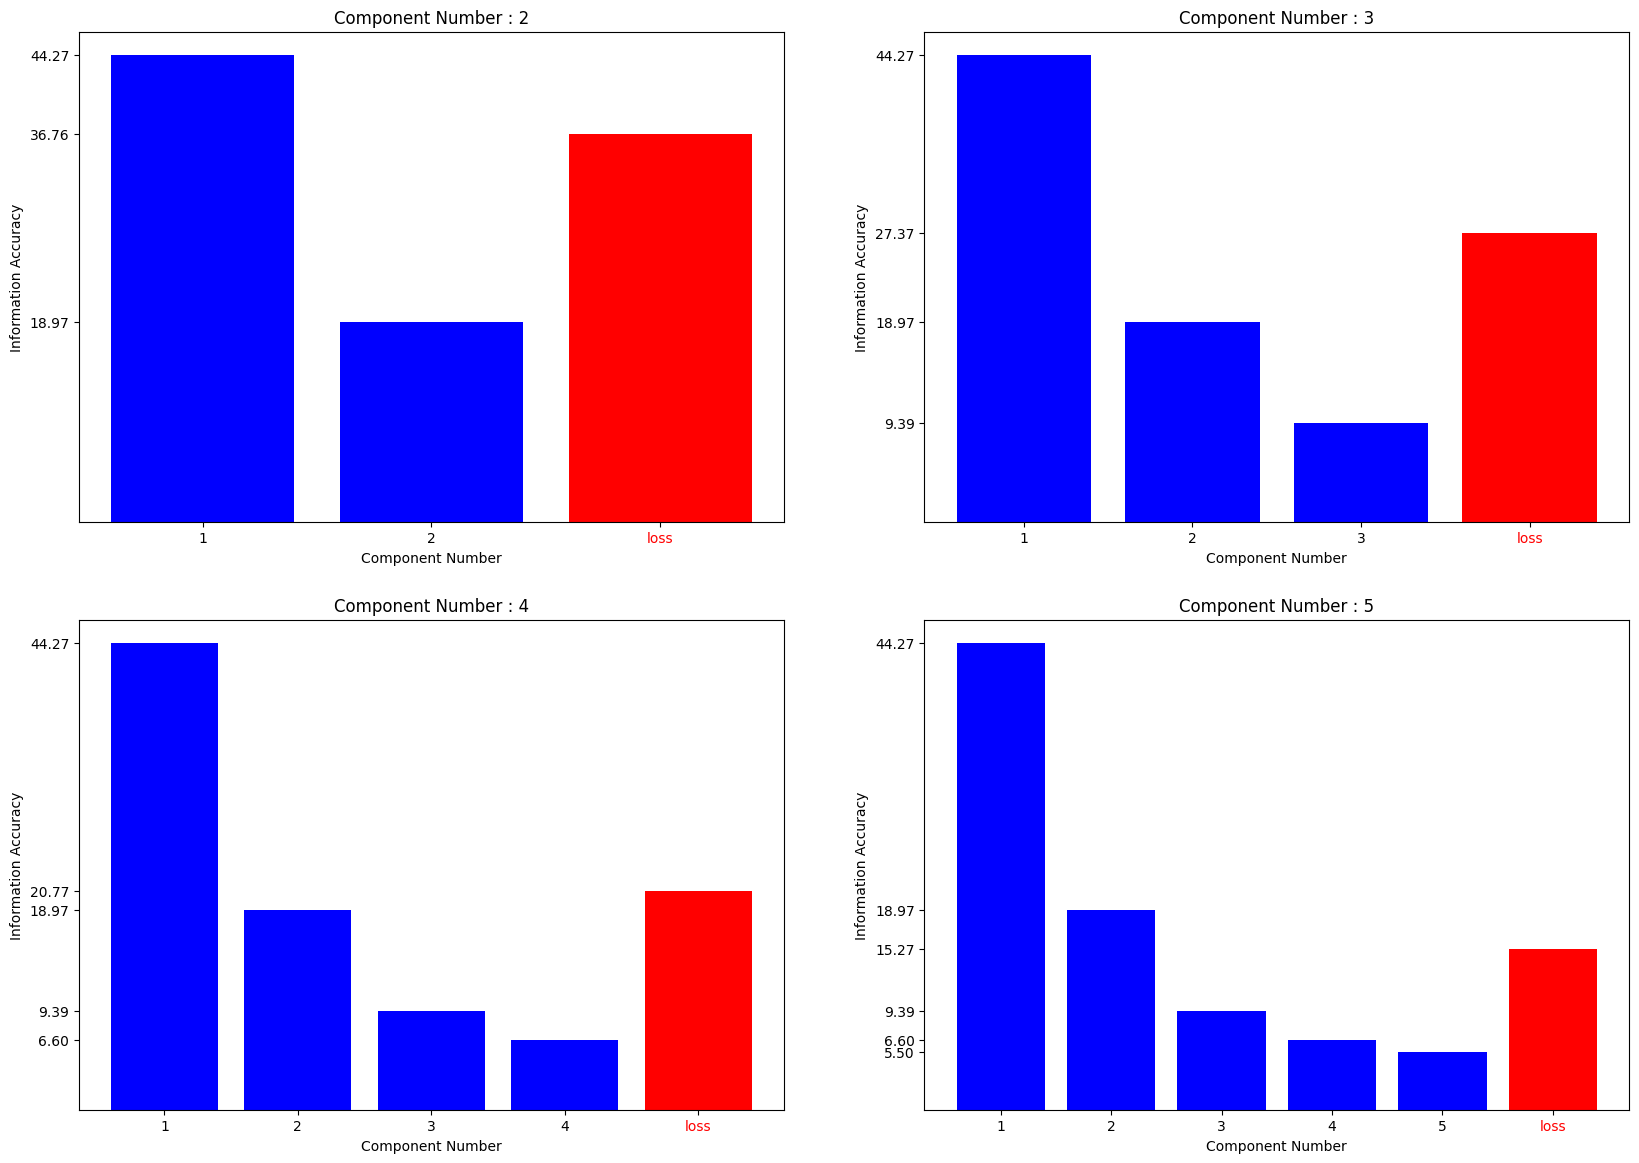

In [17]:
# Create Bar chart to illustrate explained_variance_ratio and loss percentage.
PCA_Breast.Information_Percentage_Graph()

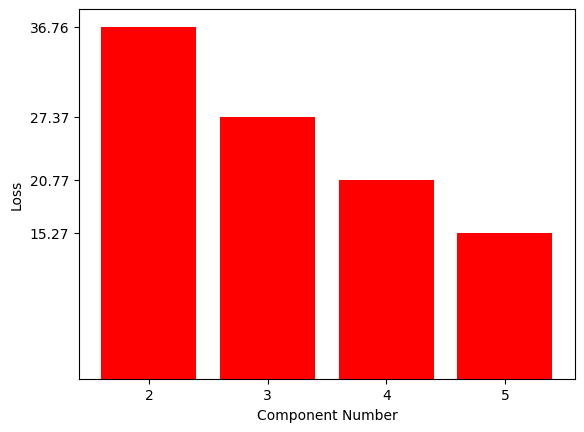

In [18]:
# Create a Bar chart to illustrate loss percentages of each case
PCA_Breast.Loss_Percentage_Graph()


In [19]:
# Gets all case's training data which is processed by PCA.
data = PCA_Breast.DATA()

In [20]:
# If we would like to train ML, we can now use those datasets.
for i in range(len(data)):
    print(data[i].shape, labels.shape)

(569, 2) (569, 1)
(569, 3) (569, 1)
(569, 4) (569, 1)
(569, 5) (569, 1)


TASK 3 OF PART 2 

In [21]:
# SETTING PCA percentages 
PCA_Breast_Percentage = PCA_TEST(
    normalised_breast,
    0.90,
    0.80,
    0.70,
    0.60,
    0.50
)


In [22]:
# Train dataset without PCA
result_without_pca = TRAIN_WITHOUT_PCA(breast_data, breast_labels)
TIME_WITHOUT_PCA = result_without_pca[2]
print(result_without_pca[4])



Epoch 1/20


11/11 [==============================] - 2s 28ms/step - loss: 30.9990 - accuracy: 0.5073 - val_loss: 10.5402 - val_accuracy: 0.6667
Epoch 2/20
11/11 [==============================] - 0s 11ms/step - loss: 3.8429 - accuracy: 0.6158 - val_loss: 0.3051 - val_accuracy: 0.8772
Epoch 3/20
11/11 [==============================] - 0s 11ms/step - loss: 1.1136 - accuracy: 0.6950 - val_loss: 0.8470 - val_accuracy: 0.6667
Epoch 4/20
11/11 [==============================] - 0s 11ms/step - loss: 0.5787 - accuracy: 0.8299 - val_loss: 0.1592 - val_accuracy: 0.9298
Epoch 5/20
11/11 [==============================] - 0s 11ms/step - loss: 0.3701 - accuracy: 0.8651 - val_loss: 0.1167 - val_accuracy: 0.9561
Epoch 6/20
11/11 [==============================] - 0s 10ms/step - loss: 0.6337 - accuracy: 0.8065 - val_loss: 1.0164 - val_accuracy: 0.8158
Epoch 7/20
11/11 [==============================] - 0s 10ms/step - loss: 0.9695 - accuracy: 0.7713 - val_loss: 0.6206 - val_accuracy: 0.8596
Epoch 8

In [23]:
# Train dataset with PCA

# nComponent
results_INT = PCA_Breast.TRAIN(labels, TIME_WITHOUT_PCA)

# Percentage
results_FLOAT = PCA_Breast_Percentage.TRAIN(labels, TIME_WITHOUT_PCA)

Epoch 1/20
11/11 [==============================] - 1s 28ms/step - loss: 0.2706 - accuracy: 0.8592 - val_loss: 0.1405 - val_accuracy: 0.9386
Epoch 2/20
11/11 [==============================] - 0s 9ms/step - loss: 0.2325 - accuracy: 0.9384 - val_loss: 0.0881 - val_accuracy: 0.9561
Epoch 3/20
11/11 [==============================] - 0s 9ms/step - loss: 0.1658 - accuracy: 0.9384 - val_loss: 0.1147 - val_accuracy: 0.9561
Epoch 4/20
11/11 [==============================] - 0s 11ms/step - loss: 0.1515 - accuracy: 0.9413 - val_loss: 0.1191 - val_accuracy: 0.9386
Epoch 5/20
11/11 [==============================] - 0s 10ms/step - loss: 0.1490 - accuracy: 0.9384 - val_loss: 0.1061 - val_accuracy: 0.9561
Epoch 6/20
11/11 [==============================] - 0s 8ms/step - loss: 0.1512 - accuracy: 0.9443 - val_loss: 0.1104 - val_accuracy: 0.9649
Epoch 7/20
11/11 [==============================] - 0s 10ms/step - loss: 0.1532 - accuracy: 0.9355 - val_loss: 0.1176 - val_accuracy: 0.9386
Epoch 8/20
11/11

In [24]:
# Results

print('Components:')
[print(item) for item in results_INT]

print()

print('Percentages:')
[print(item) for item in results_FLOAT]

Components:
[*] | Shape: (569, 2) | Component Count: 2 | Test Loss: 0.0755 | Test Accuracy: 0.9737 | Time: 3.2169 | Validation Accuracy: 0.9386 | Speed: 0.0202%
[*] | Shape: (569, 3) | Component Count: 3 | Test Loss: 0.1034 | Test Accuracy: 0.9561 | Time: 2.6093 | Validation Accuracy: 0.9561 | Speed: 0.0430%
[*] | Shape: (569, 4) | Component Count: 4 | Test Loss: 0.1177 | Test Accuracy: 0.9561 | Time: 2.5080 | Validation Accuracy: 0.9737 | Speed: 0.0468%
[*] | Shape: (569, 5) | Component Count: 5 | Test Loss: 0.1641 | Test Accuracy: 0.9737 | Time: 2.3669 | Validation Accuracy: 0.9825 | Speed: 0.0521%

Percentages:
[*] | Shape: (569, 7) | Component Count: 0.9 | Test Loss: 0.0846 | Test Accuracy: 0.9649 | Time: 2.3819 | Validation Accuracy: 0.9561 | Speed: 0.0515%
[*] | Shape: (569, 5) | Component Count: 0.8 | Test Loss: 0.1412 | Test Accuracy: 0.9737 | Time: 2.2312 | Validation Accuracy: 0.9561 | Speed: 0.0572%
[*] | Shape: (569, 3) | Component Count: 0.7 | Test Loss: 0.1361 | Test Accu

[None, None, None, None, None]

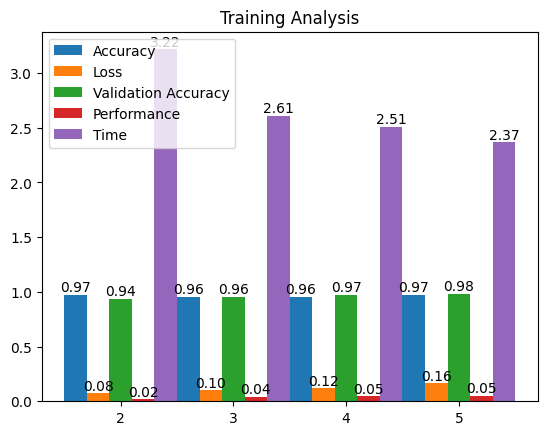

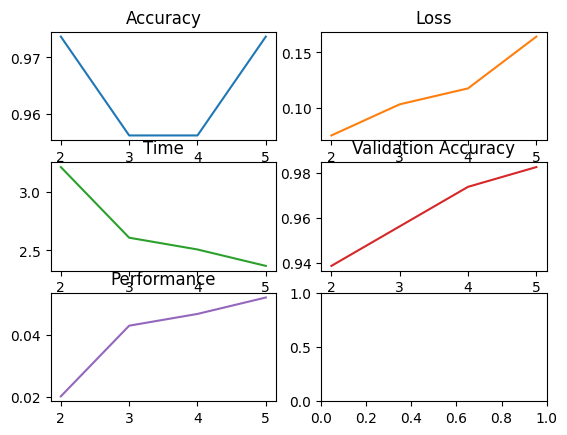

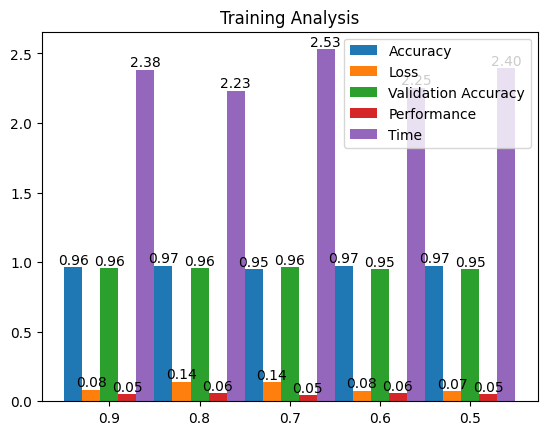

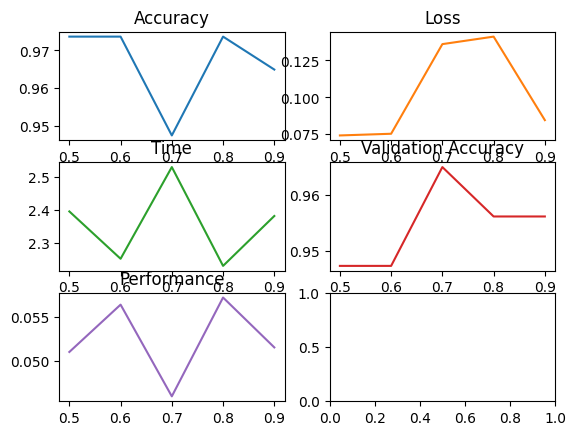

In [25]:
# Graph of All results.

PCA_Breast.TRAIN_GRAPH()
PCA_Breast_Percentage.TRAIN_GRAPH()